# Apresentação do Problema

**Definição do Problema:** Classificação de células renais com base em dados genéticos.

Os processos atuais de classificação de células estão muito sujeitos ao tratamento aplicado na obtenção dos dados e consequentemente do especialista. Um algoritmo tornaria o processo mais acurado e menos viesado, sendo também mais rápido que os meios atuais e permitindo obter insights sobre a relevância de determinados genes para diferentes tipos celulares.

A Classificação de células renais é um primeiro passo no processo de obtenção de um fármaco que possibilite com que as pessoas possam nascer com rins em melhor estado. Atualmente sabe-se que um idoso humano possui cerca de 50% do número de células renais em comparação ao nascimento e estas não são repostas pelo nosso organismo. Tal  fenômeno faz com que várias pessoas tenham diversos problemas na terceira idade como, por exemplo, problemas com pressão, incontinência urinária etc.

Alguns tipos de células renais desempenham papel mais relevante que outros e seria interessante obter um fármaco que pudesse “direcionar” a quantidade de certos tipos celulares nos rins. O primeiro passo neste super desafio é a classificação de células, problema relevante na ciência. A título de curiosidade, há uma equipe no MIT tentando descobrir e classificar todos os tipos celulares do corpo humano, desta forma consideramos o problema de alto impacto.

O dataset utilizado possui um número muito grande de colunas (mais de 30.000) e um grande número de linhas (mais de 30.000). Um dos nossos maiores desafios é lidar com essa grande quantidade de dados. 

Consideramos o trabalho de elevada relevância visto que pesquisas e tratamentos usando padrões genéticos se tornam cada vez mais frequentes. Parte disso se deve a redução de custo do sequenciamento do genoma humano, que passou de 5.000,00  US\\$ em 2001 para menos de 0,001 US\$ em 2021 para cada Mb segundo dados da Nation Human Genome Research Institute (NHGRI). 


# Análise Exploratória

## Importando Bibliotecas

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [2]:
# verificando as versões das bibliotecas utilizadas
print(f'Pandas version: {pd.__version__}')
print(f'Numpy version: {np.__version__}')

Pandas version: 1.1.5
Numpy version: 1.21.5


O conjunto de dados original era muito grande (mais de 30.000 colunas e 30.000 linhas) portanto, por questões de capacidade computacional, usaremos apenas parte destes dados.

Para preparar os dados que usaremos já foi aplicado train_test_split no banco original e selecionado apenas parte dele para treinar os modelos, de modo que os dados já estão aleatorizados e não é necessário repetir esta etapa.

## Importando os Dados de Treino

In [3]:
# Importando dados de treino
df_train = pd.read_csv('X_train.csv')
df_train.head()

,celula,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,...,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1,Diet,cluster
0,LPD1_CTACGGGCACATTGTG.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,LPD,UE-trunk.CD
1,NP2_CCCTCAAGTGCCCAGT.1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,NPD,Med.Str
2,NPD1_TCATATCAGCTCGTGC.1,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,NPD,UB-3
3,NP2_ATGGTTGGTAGGAGTC.1,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,NPD,UE-Tip
4,NP2_ACAAAGACAGTTCACA.1,0,0,0,0,0,0,2,1,0,...,0,0,0,0,0,0,0,0,NPD,NPC.com


### Verificando se há dados faltantes

In [4]:
# Verificando se há dados faltantes
df_train.isnull().sum()

celula            0
Xkr4              0
Gm1992            0
Gm37381           0
Rp1               0
                 ..
CAAA01118383.1    0
Vmn2r122          0
CAAA01147332.1    0
Diet              0
cluster           0
Length: 31056, dtype: int64

Desta forma obtemos um objeto pandas.Series com 31056 entradas e precisamos verificar se algumas delas é diferente de zero. Para isso vamos nomear este objeto e aplicar o método .sum()

In [5]:
df_train_na = df_train.isnull().sum()
df_train_na.sum()

0

Podemos ver que não há dados faltantes.

In [6]:
# A coluna 'celula' funciona como um Id e será apagada
del df_train['celula']

In [7]:
df_train.shape

(8000, 31055)

## Verificando se há relação entre as variáveis 'Diet' e 'cluster'

In [8]:
# separando apenas as colunas de interesse
df = df_train[['Diet', 'cluster']]
df.head()

,Diet,cluster
0,LPD,UE-trunk.CD
1,NPD,Med.Str
2,NPD,UB-3
3,NPD,UE-Tip
4,NPD,NPC.com


In [9]:
# obtendo a quantidade de células para cada grupo de acordo com o tipo de dieta
df2 = df.groupby(by=['Diet', 'cluster']).size().reset_index(name='counts')
df2

,Diet,cluster,counts
0,LPD,Cort.Str,309
1,LPD,DT.LoH,225
2,LPD,Immune,38
3,LPD,Med.Str,471
4,LPD,Mesangium,132
5,LPD,NPC,393
6,LPD,NPC.com,395
7,LPD,Nep_Prog_Stromal,112
8,LPD,Papillary interstitium,173
9,LPD,Pelvic interstitium,438


In [10]:
# obtendo valores percentuais
df3 = df2.copy()
df3['counts'] = df3['counts'] / df3['counts'].sum()

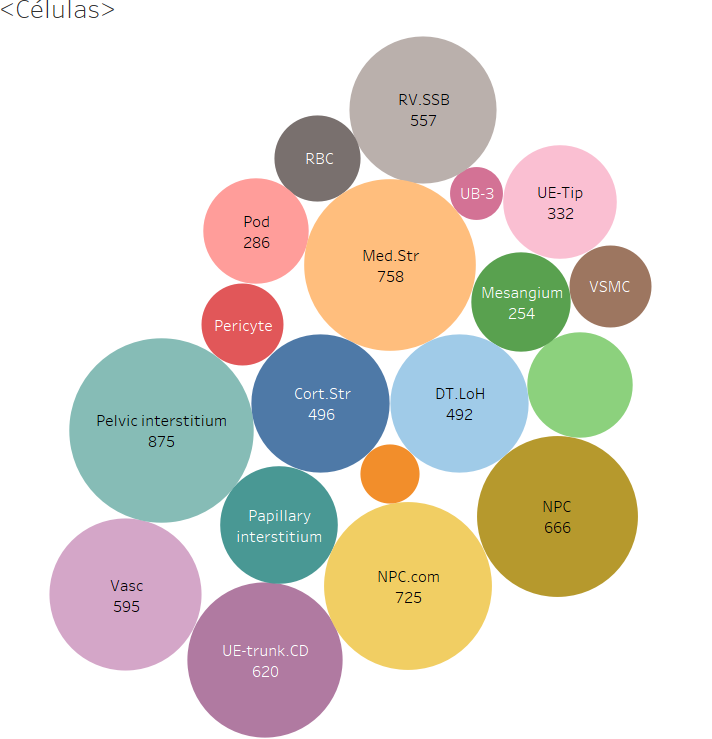

In [6]:
from IPython.display import Image
Image(filename='image.png',width=600, height=200)

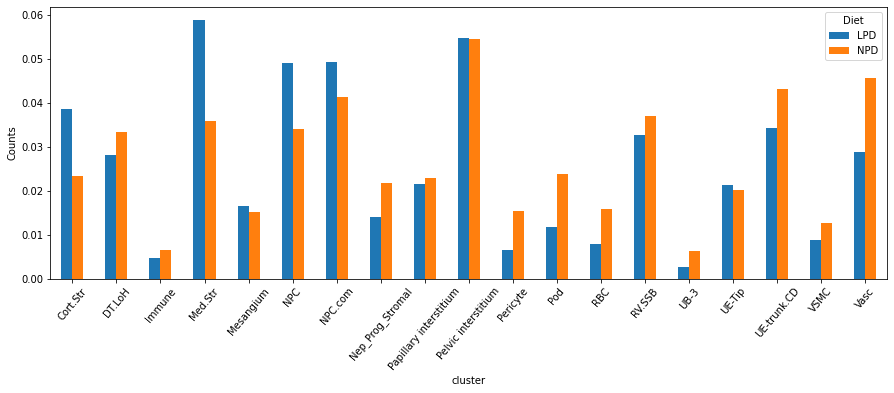

In [11]:
# visualizando a relação entre a quantidade percentual de células em cada classe, por tipo de dieta
df3.pivot("cluster", "Diet", "counts").plot(kind='bar', figsize=(15,5))
plt.xticks(rotation=50)
plt.ylabel('Counts')
plt.show()

In [12]:
#veriricar se a diferença de dieta para algumas classes corresponde a diferença provocadas pela dieta ou por fatores próprios do indivíduo, isto é, temos que saber se há a mesma quantidade de indivíduos com dieta LPD e NPD.

## Teste Qui-Quadrado de Pearson


O teste Qui-Quadrado é um teste de hipótese que assume como hipótese nula que frequências observadas para variáveis categóricas seguem frequências esperadas. O teste calcula uma estatística que segue uma distribuição Qui-Quadrado.

Este teste é calculado para uma tabela de contingência, primeiramente calculando a frequência esperada para cada grupo e então determinando se a divisão dos grupos afetou a frequência esperada.

As variáveis são consideradas independentes se as frequências observadas são similares.

Se a estatística gerada pelo teste for maior ou igual a um dado valor crítico, então rejeita-se a hipótese nula, ou seja, as amostras são dependentes.

A quantidade de graus ed liberdade para uma tabela de contingência é dada por `(número de colunas - 1) * (número de linhas - 1)`

O teste Qui-Quadrado de Pearson pode ser calculado em `Python` usando a função `chi2_contingency()` do pacote `SciPy`.

A função recebe um array como tabela de contingência e retorna a estatística calculada e o p-valor, bem como os graus de liberdade e a tabela de frequências esperadas.

In [13]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [14]:
# Tabela de Contingência
tabela_cont = df2.pivot("cluster", "Diet", "counts")
tabela_cont

Diet,LPD,NPD
cluster,,
Cort.Str,309,187
DT.LoH,225,267
Immune,38,52
Med.Str,471,287
Mesangium,132,122
NPC,393,273
NPC.com,395,330
Nep_Prog_Stromal,112,174
Papillary interstitium,173,183


In [15]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

In [16]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

Dependente (rejeita H0)


Sendo assim, podemos afirmar que o tipo de dieta e a quantidade de células presentes em cada grupo possuem relação.

## Visualizando com UMAP

`UMAP` é um algoritmo de redução de dimensionalidade que funciona muito bem com datasets grandes.

In [17]:
import umap.umap_ as umap

In [20]:
# definindo as cores para cada classe
colors = {'UE-trunk.CD':1,
          'Med.Str':2,
          'UB-3':3,
          'UE-Tip':4,
          'NPC.com':5,
          'RV.SSB':6,
          'VSMC':7,
          'Cort.Str':8,
          'Vasc':9,
          'DT.LoH':10,
          'Papillary interstitium':11,
          'Mesangium':12,
          'Pelvic interstitium':13,
          'Pericyte':14,
          'Nep_Prog_Stromal':15,
          'NPC':16,
          'RBC':17,
          'Pod':18,
          'Immune':19}

y_colors = df_train['cluster'].map(colors)

In [23]:
# Obtendo o conjunto projetado em dimensão 2
reducer = umap.UMAP(min_dist=0.9, n_neighbors=10).fit(df_train.iloc[:,:-2])
embedding = reducer.transform(df_train.iloc[:,:-2])

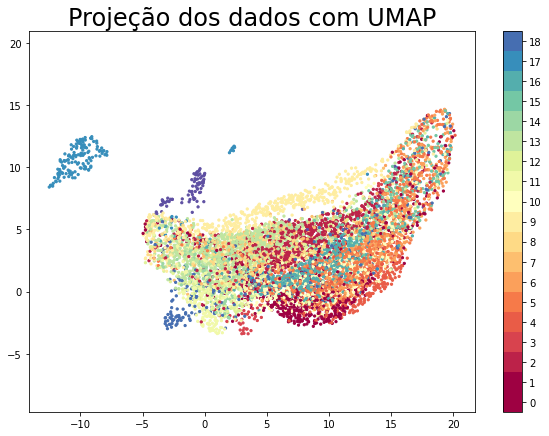

In [24]:
# plotando os dados projetados
plt.figure(figsize=(10,7))
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_colors, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(20)-0.5).set_ticks(np.arange(19))
plt.title('Projeção dos dados com UMAP', fontsize=24)
plt.show()

# Pré processamento dos dados

Nesta etapa vamos deixar os dados prontos para serem utilizados para treinar modelos de aprendizado de máquina.

## Escalando os Dados

Há várias formas de escalonar os dados, entretando usaremos $\log(dados+1))$ pois já é conhecido na área de genética que tal escalonamento apresenta desempenho significativamente melhor que os demais na grande maioria dos casos.

In [25]:
df_norm = df_train.iloc[:,:-2]
df_norm = np.log(df_norm + 1)
df_norm.head()

,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,Tcea1,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.000000,0.0,1.386294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.386294,0.000000,0.0,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.000000,0.0,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.693147,0.0,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Incluindo as colunas 'Diet' e 'cluster' aos dados escalonados
df_norm['Diet'] = df_train['Diet']
df_norm['cluster'] = df_train['cluster']
df_norm.head()

,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,Tcea1,...,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1,Diet,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LPD,UE-trunk.CD
1,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.000000,0.0,1.386294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NPD,Med.Str
2,0.0,0.0,0.0,0.0,0.0,0.0,1.386294,0.000000,0.0,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NPD,UB-3
3,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.000000,0.0,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NPD,UE-Tip
4,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.693147,0.0,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NPD,NPC.com


In [27]:
# liberando a variável df_train para liberar memória
df_train = 1

## Aplicando One Hot Encoding

A coluna 'Diet' é categórica; NPD significa 'Normal Protein Diet' e LPD significa 'Low Protein Diet'. Essa coluna nos permite verificar se uma dieta com baixo valor de proteína afeta a quantidade de células renais presentes em cada grupo quando comparada à uma dieta normal.

Vamos aplicar One Hot Encoding para tratar adequadamente esses valores nos treinamentos dos modelos.

In [28]:
# aplicando OneHotEncoding
encoder = OneHotEncoder(sparse=False)
df_norm_encoded = pd.DataFrame(encoder.fit_transform(df_norm[['Diet']]))
df_norm_encoded.columns = encoder.get_feature_names_out(['Diet'])
df_norm.drop(['Diet'] ,axis=1, inplace=True)

In [29]:
# Juntando as novas colunas ao DataFrame
df_norm = pd.concat([df_norm, df_norm_encoded], axis=1)
df_norm.head()

,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,Tcea1,...,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1,cluster,Diet_LPD,Diet_NPD
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UE-trunk.CD,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.000000,0.0,1.386294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Med.Str,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.386294,0.000000,0.0,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UB-3,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.000000,0.0,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UE-Tip,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.693147,0.0,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NPC.com,0.0,1.0


In [30]:
# salvando os dados prontos para serem usados como treino
#df_norm.to_csv('df_train_encoded.csv', index=False)

## Verificando se as classes estão desbalanceadas

In [31]:
df_norm['cluster'].value_counts()

Pelvic interstitium       875
Med.Str                   758
NPC.com                   725
NPC                       666
UE-trunk.CD               620
Vasc                      595
RV.SSB                    557
Cort.Str                  496
DT.LoH                    492
Papillary interstitium    356
UE-Tip                    332
Nep_Prog_Stromal          286
Pod                       286
Mesangium                 254
RBC                       191
Pericyte                  176
VSMC                      173
Immune                     90
UB-3                       72
Name: cluster, dtype: int64

In [32]:
df_norm['cluster'].value_counts() / df_norm.shape[0]

Pelvic interstitium       0.109375
Med.Str                   0.094750
NPC.com                   0.090625
NPC                       0.083250
UE-trunk.CD               0.077500
Vasc                      0.074375
RV.SSB                    0.069625
Cort.Str                  0.062000
DT.LoH                    0.061500
Papillary interstitium    0.044500
UE-Tip                    0.041500
Nep_Prog_Stromal          0.035750
Pod                       0.035750
Mesangium                 0.031750
RBC                       0.023875
Pericyte                  0.022000
VSMC                      0.021625
Immune                    0.011250
UB-3                      0.009000
Name: cluster, dtype: float64

Podemos ver que as classes estão desbalanceadas. A maior classe possui 875 observações e a menor classe possui 72 observações, correspondendo a cerca de 11% e 1% das observações, respectivamente.

Este é um ponto de atenção, pois alguns algoritmos não conseguem lidar bem com classes desbalanceadas. Existem várias técnicas para balanceamento de classes como, por exemplo, oversampling (aumentar as classes menores com dados artificiais até que todas as classes tenham aproximadamente mesma quantidade de observações), undersampling (retirar dados das classes maiores até que todas as classes tenham aproximadamente mesma quantidade de observações), entre outras.

No nosso caso, oversampling não irá funcionar pois iremos ter que produzir uma quantidade muito grande de dados e ficaremos sem recursos computacionais para treinar os modelos. Undersampling também não irá funcionar pois ficaremos com tão poucos dados que nossos modelos provavalemente não conseguirão aprender nenhum padrão.

Devemos tentar usar alguns modelos que tenham melhor desempenho com classes desbalanceadas e também devemos usar métricas adequadas para avaliar esses algoritmos. Acurácia pode não ser a métrica mais indicada neste caso, pois é uma medida afetada pelo desbalanceamento de classes.

## Importando e tratando dados de teste

Agora iremos aplicar as mesmas mudanças aos dados de teste.

In [33]:
# importando os dados
df_test = pd.read_csv('X_test.csv')
df_test.head()

,celula,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,...,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1,Diet,cluster
0,NPD1_TCGGTCTAGCCTCAAT.1,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,NPD,Papillary interstitium
1,NPD1_GCATCGGAGTTAGTAG.1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,NPD,RV.SSB
2,LPD1_TCATTGTGTTGCTAGT.1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,LPD,NPC
3,LPD2_ATGTCCCAGTTACGGG.1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,LPD,UB-3
4,NPD1_CATAAGCCACACACGC.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NPD,Pelvic interstitium


In [34]:
# verificando se há dados faltantes
df_test.isnull().sum()

celula            0
Xkr4              0
Gm1992            0
Gm37381           0
Rp1               0
                 ..
CAAA01118383.1    0
Vmn2r122          0
CAAA01147332.1    0
Diet              0
cluster           0
Length: 31056, dtype: int64

In [35]:
df_test_na = df_test.isnull().sum()
df_test_na.sum()

0

Podemos ver que não há dados faltantes.

In [36]:
# eliminando a coluna 'celula'
del df_test['celula']

In [37]:
df_test.shape

(4000, 31055)

## Escalando os dados

In [38]:
# aplicando o escalonamento
df_norm = df_test.iloc[:,:-2]
df_norm = np.log(df_norm + 1)
df_norm.head()

,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,Tcea1,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1
0,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.693147,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.693147,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Incluindo as colunas 'Diet' e 'cluster' aos dados escalonados
df_norm['Diet'] = df_test['Diet']
df_norm['cluster'] = df_test['cluster']
df_norm.head()

,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,Tcea1,...,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1,Diet,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NPD,Papillary interstitium
1,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.693147,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NPD,RV.SSB
2,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LPD,NPC
3,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.693147,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LPD,UB-3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NPD,Pelvic interstitium


In [40]:
# liberando a variável df_test para liberar memória
df_test = 1

## Aplicando One Hot Encoding

In [41]:
# Aplicando OneHotEncoding
encoder = OneHotEncoder(sparse=False)
df_norm_encoded = pd.DataFrame(encoder.fit_transform(df_norm[['Diet']]))
df_norm_encoded.columns = encoder.get_feature_names_out(['Diet'])
df_norm.drop(['Diet'] ,axis=1, inplace=True)

In [42]:
# Juntando as novas colunas ao DataFrame
df_norm = pd.concat([df_norm, df_norm_encoded], axis=1)
df_norm.head()

,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,Tcea1,...,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1,cluster,Diet_LPD,Diet_NPD
0,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Papillary interstitium,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.693147,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RV.SSB,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NPC,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.693147,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UB-3,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pelvic interstitium,0.0,1.0


In [43]:
# salvando os dados prontos para serem usados como teste
#df_norm.to_csv('df_test_encoded.csv', index=False)

## Verificando se as classes estão desbalanceadas

In [44]:
df_norm['cluster'].value_counts()

Pelvic interstitium       401
Med.Str                   373
NPC.com                   349
UE-trunk.CD               343
Vasc                      337
NPC                       317
RV.SSB                    285
DT.LoH                    263
Cort.Str                  251
Papillary interstitium    201
UE-Tip                    146
Mesangium                 136
Nep_Prog_Stromal          132
Pod                       131
RBC                        89
Pericyte                   87
VSMC                       67
Immune                     50
UB-3                       42
Name: cluster, dtype: int64

In [45]:
df_norm['cluster'].value_counts() / df_norm.shape[0]

Pelvic interstitium       0.10025
Med.Str                   0.09325
NPC.com                   0.08725
UE-trunk.CD               0.08575
Vasc                      0.08425
NPC                       0.07925
RV.SSB                    0.07125
DT.LoH                    0.06575
Cort.Str                  0.06275
Papillary interstitium    0.05025
UE-Tip                    0.03650
Mesangium                 0.03400
Nep_Prog_Stromal          0.03300
Pod                       0.03275
RBC                       0.02225
Pericyte                  0.02175
VSMC                      0.01675
Immune                    0.01250
UB-3                      0.01050
Name: cluster, dtype: float64

Podemos observar que a frequência das classes no conjunto de teste é praticamente a mesma do conjunto de treino. O que é uma boa notícia!!!

# Importando os dados processados

In [2]:
X_train = pd.read_csv('df_train_encoded.csv')
y_train = X_train['cluster']
del X_train['cluster']
X_train.shape

(8000, 31055)

In [3]:
X_test = pd.read_csv('df_test_encoded.csv')
y_test = X_test['cluster']
del X_test['cluster']
X_test.shape

(4000, 31055)

# Criação dos Modelos de Machine Learning

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pickle

## Modelo 1 - SGDClassifier

In [5]:
from sklearn.linear_model import SGDClassifier

In [26]:
model1 = SGDClassifier(alpha = 0.01, random_state=42)
model1.fit(X_train, y_train)

SGDClassifier(alpha=0.01, random_state=42)

In [27]:
pred1 = model1.predict(X_test)

print(classification_report(y_test, pred1))

                        precision    recall  f1-score   support

              Cort.Str       0.85      0.82      0.84       251
                DT.LoH       0.95      0.94      0.94       263
                Immune       1.00      0.76      0.86        50
               Med.Str       0.89      0.90      0.90       373
             Mesangium       0.91      0.77      0.84       136
                   NPC       0.98      0.84      0.90       317
               NPC.com       0.74      0.88      0.80       349
      Nep_Prog_Stromal       0.49      0.54      0.51       132
Papillary interstitium       0.87      0.96      0.91       201
   Pelvic interstitium       0.81      0.83      0.82       401
              Pericyte       0.91      0.85      0.88        87
                   Pod       0.92      0.89      0.90       131
                   RBC       0.96      0.96      0.96        89
                RV.SSB       0.83      0.84      0.84       285
                  UB-3       1.00      

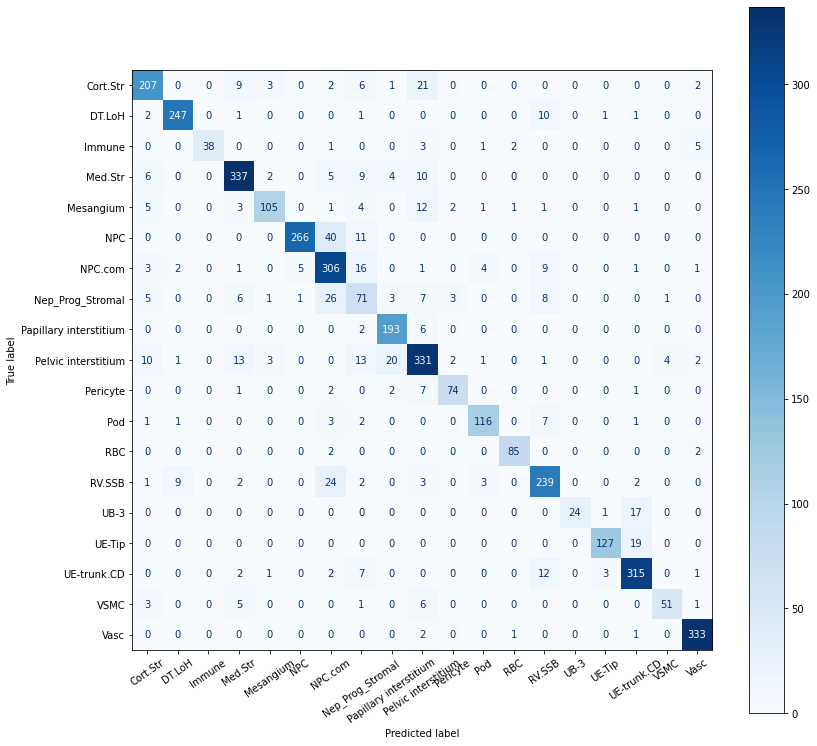

In [28]:
cm = confusion_matrix(y_test, pred1, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
fig, ax = plt.subplots(figsize=(13,13))
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation=35)
plt.show()

In [29]:
# salvando o modelo
pickle.dump(model1, open('SGD_model.sav', 'wb'))
 
# carregando o modelo
# modelo1 = pickle.load(open('SGD_model.sav', 'rb'))

## Modelo 2 - Logistic Regression

In [30]:
#importando modelo
from sklearn.linear_model import LogisticRegression

In [ ]:
model2 = LogisticRegression(class_weight='balanced', random_state=42)
model2.fit(X_train, y_train)

In [32]:
pred2 = model2.predict(X_test)

print(classification_report(y_test, pred2))

                        precision    recall  f1-score   support

              Cort.Str       0.86      0.86      0.86       251
                DT.LoH       0.94      0.95      0.94       263
                Immune       1.00      0.90      0.95        50
               Med.Str       0.90      0.89      0.90       373
             Mesangium       0.88      0.86      0.87       136
                   NPC       0.90      0.94      0.92       317
               NPC.com       0.86      0.80      0.83       349
      Nep_Prog_Stromal       0.62      0.65      0.63       132
Papillary interstitium       0.91      0.92      0.91       201
   Pelvic interstitium       0.84      0.85      0.84       401
              Pericyte       0.92      0.87      0.89        87
                   Pod       0.90      0.92      0.91       131
                   RBC       0.96      0.96      0.96        89
                RV.SSB       0.85      0.87      0.86       285
                  UB-3       0.93      

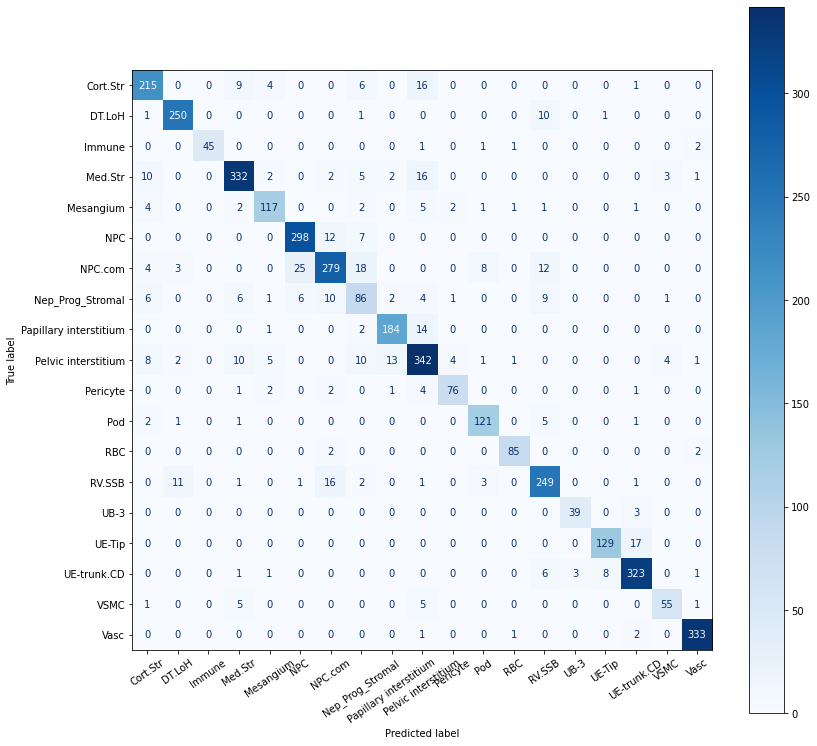

In [33]:
cm = confusion_matrix(y_test, pred2, labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
fig, ax = plt.subplots(figsize=(13,13))
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation=35)
plt.show()

In [34]:
# salvando o modelo
pickle.dump(model2, open('Logistic_model.sav', 'wb'))
 
# carregando o modelo
# modelo2 = pickle.load(open('Logistic_model.sav', 'rb'))

## Modelo 3 - SVM

In [5]:
#importando modelo
from sklearn.svm import SVC

In [13]:
model3 = SVC(class_weight='balanced', kernel='linear', random_state=42)
model3.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear', random_state=42)

In [14]:
pred3 = model3.predict(X_test)

print(classification_report(y_test, pred3))

                        precision    recall  f1-score   support

              Cort.Str       0.88      0.90      0.89       251
                DT.LoH       0.93      0.95      0.94       263
                Immune       1.00      0.80      0.89        50
               Med.Str       0.90      0.89      0.90       373
             Mesangium       0.94      0.80      0.87       136
                   NPC       0.93      0.95      0.94       317
               NPC.com       0.88      0.84      0.86       349
      Nep_Prog_Stromal       0.63      0.85      0.72       132
Papillary interstitium       0.95      0.88      0.91       201
   Pelvic interstitium       0.79      0.89      0.84       401
              Pericyte       0.96      0.74      0.83        87
                   Pod       0.91      0.88      0.89       131
                   RBC       0.98      0.93      0.95        89
                RV.SSB       0.89      0.89      0.89       285
                  UB-3       0.94      

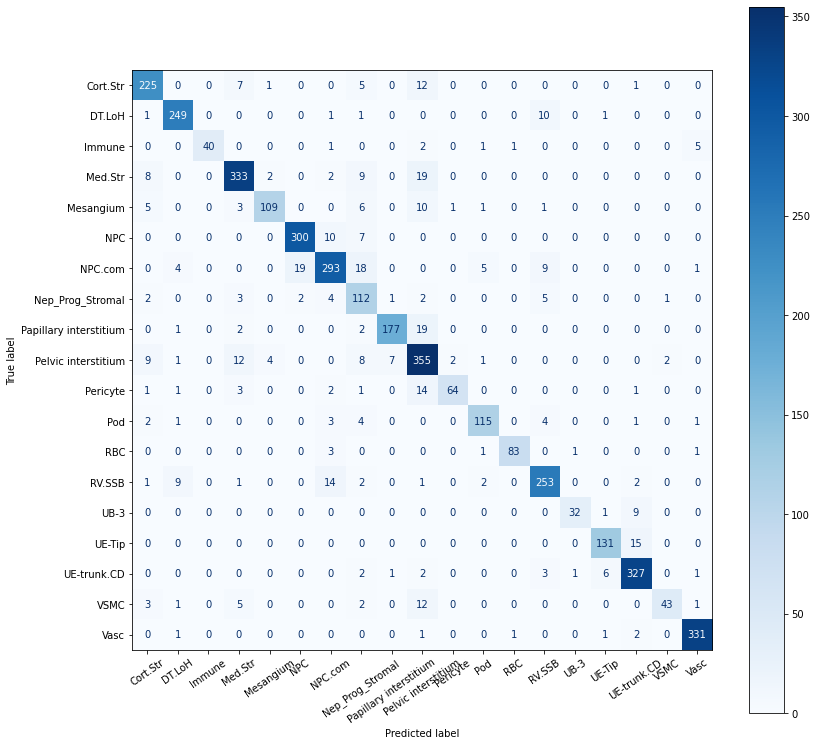

In [15]:
cm = confusion_matrix(y_test, pred3, labels=model3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model3.classes_)
fig, ax = plt.subplots(figsize=(13,13))
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation=35)
plt.show()

In [16]:
# salvando o modelo
pickle.dump(model3, open('SVM_model.sav', 'wb'))
 
# carregando o modelo
# model3 = pickle.load(open('SVM_model.sav', 'rb'))

## Modelo 4 - Random Forest

In [20]:
#importando modelo
from sklearn.ensemble import RandomForestClassifier

In [30]:
model4 = RandomForestClassifier(random_state=42)
model4.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
pred4 = model4.predict(X_test)

print(classification_report(y_test, pred4))

                        precision    recall  f1-score   support

              Cort.Str       0.85      0.69      0.76       251
                DT.LoH       0.94      0.85      0.89       263
                Immune       1.00      0.70      0.82        50
               Med.Str       0.69      0.90      0.78       373
             Mesangium       1.00      0.41      0.58       136
                   NPC       0.78      0.89      0.83       317
               NPC.com       0.69      0.77      0.73       349
      Nep_Prog_Stromal       0.52      0.52      0.52       132
Papillary interstitium       0.95      0.66      0.78       201
   Pelvic interstitium       0.56      0.87      0.68       401
              Pericyte       0.90      0.10      0.19        87
                   Pod       0.93      0.59      0.72       131
                   RBC       1.00      0.17      0.29        89
                RV.SSB       0.79      0.87      0.83       285
                  UB-3       1.00      

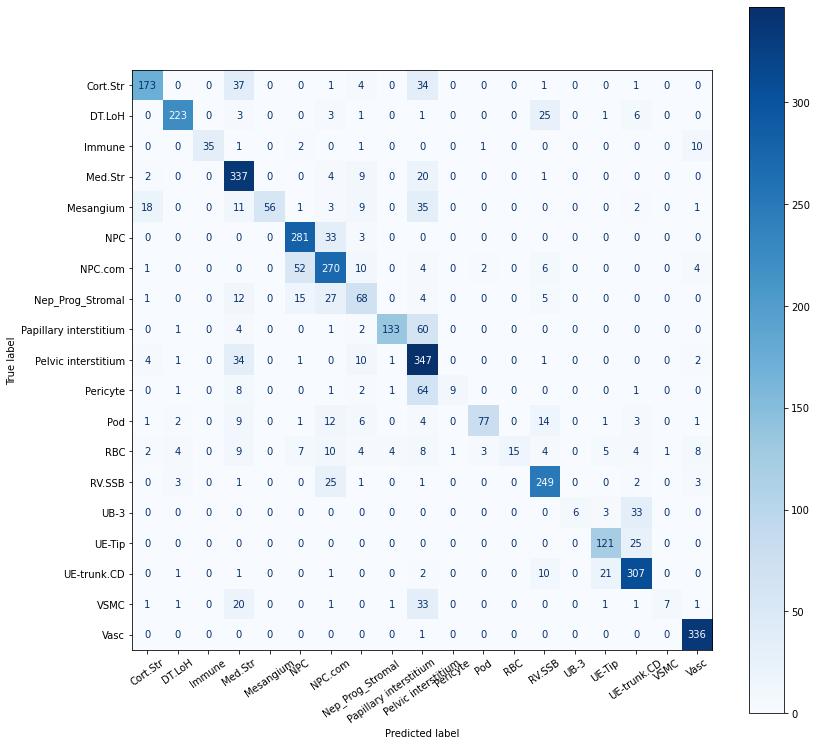

In [32]:
cm = confusion_matrix(y_test, pred4, labels=model4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model4.classes_)
fig, ax = plt.subplots(figsize=(13,13))
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation=35)
plt.show()

In [35]:
# verificando as variáveis mais importantes para o modelo
feature_imp = pd.Series(model4.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_imp

Tmsb4x           0.005194
Crym             0.004085
Lgals1           0.003756
Cldn7            0.003705
Cdkn1c           0.003479
                   ...   
Kcnk16           0.000000
Gm30054          0.000000
Cfap70           0.000000
7330404K18Rik    0.000000
Xkr4             0.000000
Length: 31055, dtype: float64

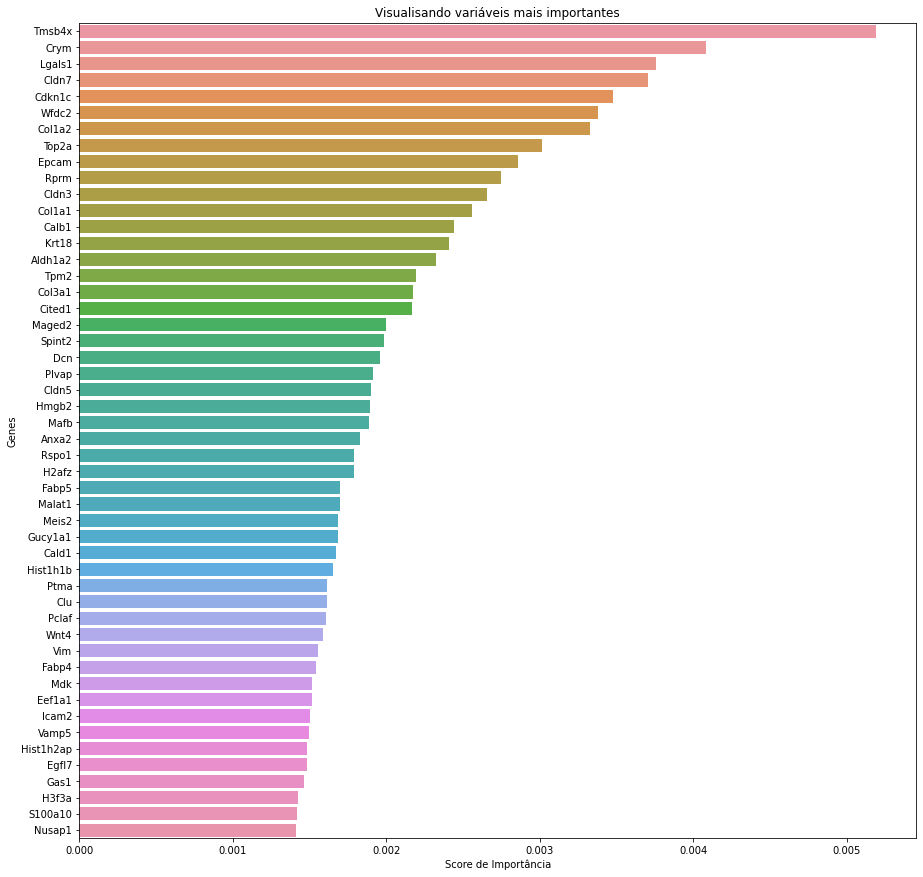

In [38]:
# Criando um gráfico de barras
plt.figure(figsize=(15,15))
sns.barplot(x=feature_imp[0:50], y=feature_imp.index[0:50])

# adicionando labels ao gráfico
plt.xlabel('Score de Importância')
plt.ylabel('Genes')
plt.title("Visualisando variáveis mais importantes")
plt.show()

In [39]:
# salvando o modelo
pickle.dump(model4, open('RandomForest_model.sav', 'wb'))
 
# carregando o modelo
# modelo4 = pickle.load(open('RandomForest_model.sav', 'rb'))

# Modelo 5 - Multi Layer Perceptron

In [40]:
#importando modelo
from sklearn.neural_network import MLPClassifier

In [42]:
model5 = MLPClassifier(hidden_layer_sizes=(500,), random_state=42)
model5.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(500,), random_state=42)

In [43]:
pred5 = model5.predict(X_test)

print(classification_report(y_test, pred5))

                        precision    recall  f1-score   support

              Cort.Str       0.87      0.86      0.87       251
                DT.LoH       0.93      0.93      0.93       263
                Immune       1.00      0.88      0.94        50
               Med.Str       0.84      0.89      0.86       373
             Mesangium       0.94      0.86      0.90       136
                   NPC       0.89      0.94      0.91       317
               NPC.com       0.79      0.80      0.80       349
      Nep_Prog_Stromal       0.50      0.43      0.46       132
Papillary interstitium       0.90      0.83      0.86       201
   Pelvic interstitium       0.77      0.85      0.81       401
              Pericyte       0.96      0.84      0.90        87
                   Pod       0.88      0.89      0.89       131
                   RBC       0.99      0.87      0.92        89
                RV.SSB       0.85      0.85      0.85       285
                  UB-3       0.94      

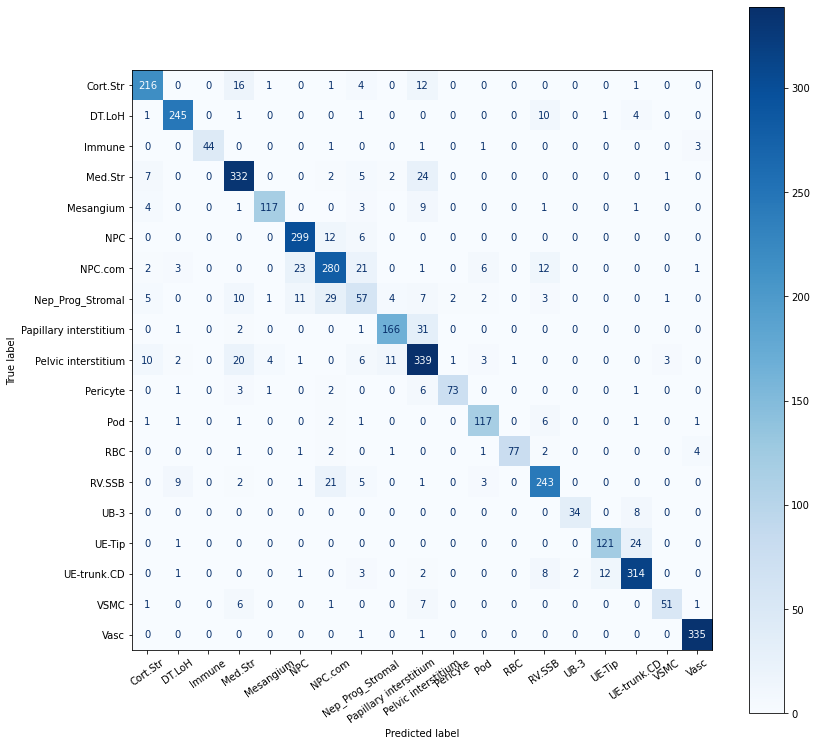

In [44]:
cm = confusion_matrix(y_test, pred5, labels=model5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model5.classes_)
fig, ax = plt.subplots(figsize=(13,13))
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation=35)
plt.show()

In [45]:
# salvando o modelo
pickle.dump(model5, open('MLP_model.sav', 'wb'))
 
# carregando o modelo
# modelo5 = pickle.load(open('MLP_model.sav', 'rb'))